# Mengestimasi area katalog

Jalankan file ini di jupyter dengan cara mengubah kernel ke `maps`. Jika kernel `maps` belum ada, lakukan langkah-langkah berikut ini:

1. Buka Anaconda Prompt
2. Buat environment baru: `conda create -n maps python=3.9`
3. Aktifkan environment `maps`: `conda activate maps`
4. Install `geopandas`: `pip install geopandas`
5. Install `matplotlib`: `pip install matplotlib`
6. Install `ipykernel`: `pip install ipykernel`
7. Daftarkan ke dalam kernel: `python -m ipykernel install --name "maps" --display-name "maps"`

Data yang disimpan dalam format shp dapat digunakan di QGIS

## 1. Import packages

In [1]:
import os
import pickle
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from custom_maps import *

## 2. Sumber gempa yang terlibat

Pertimbangkan terlebih dahulu sumber gempa yang terlibat. Beberapa sumber gempa tersebut antara lain:
1. Patahan/sesar
2. Megathrust
3. Shallow background
4. Deep background (intraslab)

Data-data geometri ini tersimpan dalam format *.shp*.

Setelah melihat sumber-sumber yang terlibat, katalog harus mencangkup semua area sumber-sumber gempa yang ada.

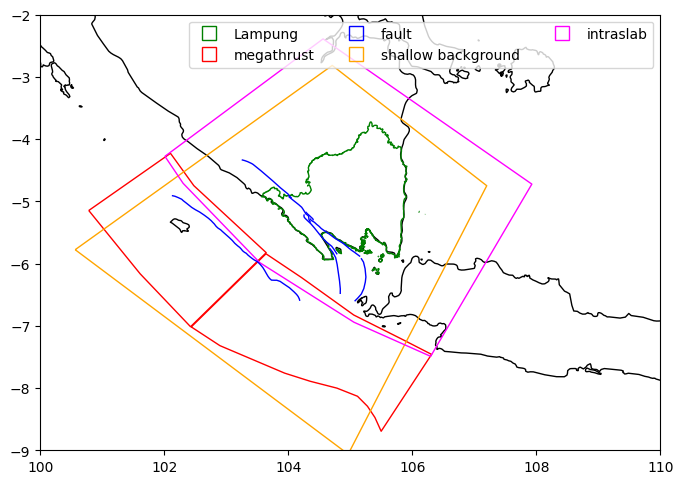

In [2]:
# open coastal area
shp_coast = gpd.read_file('./coastlines/ne_10m_land.shp')

# open Provinsi Lampung
gdf_lampung = gpd.read_file('./shp/area_lampung.shp')

# open megathrust
gdf_megathrusts = gpd.read_file('./shp/megathrusts.shp')

# open faults
gdf_faults = gpd.read_file('./shp/faults.shp')

# open shallow background
gdf_shallow_background = gpd.read_file('./shp/shallow_background.shp')

# open deep background (intraslab)
gdf_deep_background = gpd.read_file('./shp/deep_background.shp')

# matplotlib
fig, ax = plt.subplots(figsize=(8,8))

# plot basemap
shp_coast.plot(color='none', edgecolor='black', linewidth=1, ax=ax, label='coastlines')

# plot Provinsi Lampung
gdf_lampung.plot(color='none', edgecolor='green', linewidth=1, ax=ax, label='Lampung')

# plot megathrust
gdf_megathrusts.plot(color='none', edgecolor='red', linewidth=1, ax=ax, label='megathrust')

# plot faults
gdf_faults.plot(color='blue', linewidth=1, ax=ax, label='fault')

# plot shallow background
gdf_shallow_background.plot(color='none', edgecolor='orange', linewidth=1, ax=ax, label='shallow background')

# plot deep background (intraslab)
gdf_deep_background.plot(color='none', edgecolor='magenta', linewidth=1, ax=ax, label='intraslab')

# tambahkan legenda, set batas koordinat, show
lines = [
    Line2D([0], [0], linestyle="none", marker="s", markersize=10, 
           markeredgecolor=t.get_edgecolor(), markerfacecolor='none')
    for t in ax.collections[1:]
]
labels = [t.get_label() for t in ax.collections[1:]]
ax.legend(lines, labels, ncols=3)
ax.set_ylim((-9, -2))
ax.set_xlim((100, 110))
plt.show()

# menyimpan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)
fig.savefig(os.path.join(dir_figs, 'semua_sumber_gempa.png'), dpi=300)